In [1]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import utils, transforms
from PIL import Image

In [2]:
# Create the custom dataset

class FoodDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [3]:
# Display an image from the dataset
def displayImage(image, label=None):
    if label:
        plt.title(labels_map[label])
    img = np.transpose(image.squeeze(), (1,2,0)) # Change from (CxWxH) to (WxHxC) , c = colors, W = width, h = heigth
    plt.imshow(img, cmap="gray")
    plt.show()

In [4]:
batch_size = 64
input_size = 224

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor()
    ]),
}

training_data = FoodDataset("Dataset/ImageClassification/train_labels.csv", "Dataset/ImageClassification/train", data_transforms['train'])
test_data = FoodDataset("Dataset/ImageClassification/test_labels.csv", "Dataset/ImageClassification/test", data_transforms['val'])

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


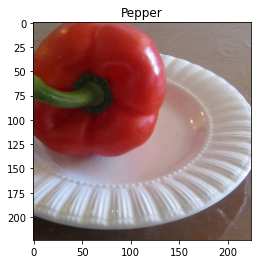

In [5]:
labels_map =  {0: 'Apple',
                1: 'Banana',
                2: 'Bean',
                3: 'Bread',
                4: 'Carrot',
                5: 'Cheese',
                6: 'Cucumber',
                7: 'Egg',
                8: 'Grape',
                9: 'Kiwi',
                10: 'Onion',
                11: 'Orange',
                12: 'Pasta',
                13: 'Pepper',
                14: 'Sauce',
                15: 'Tomato',
                16: 'Watermelon'}


sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]

displayImage(img, label)

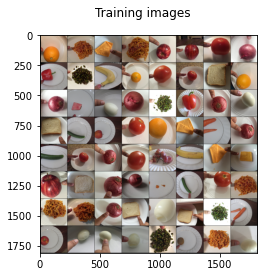

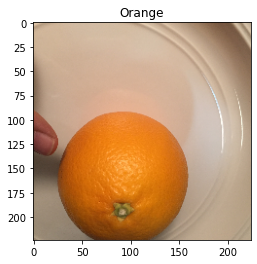

In [6]:
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
figure = plt.figure()
figure.suptitle("Training images")
displayImage(utils.make_grid(images))

displayImage(images[0], labels[0].item())